In [13]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [14]:
#load dataset
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
X = df[["area", "bedrooms", "bathrooms", "stories",	"mainroad", "guestroom", "basement", "hotwaterheating",	"airconditioning","parking","prefarea","furnishingstatus"]]
y = df["price"]
print(X.shape,y.shape)

(545, 12) (545,)


In [16]:
#preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col  = ["area", "bedrooms", "bathrooms", "stories",	"mainroad", "guestroom", "basement", "hotwaterheating",	"airconditioning","parking","prefarea","furnishingstatus"]
for col in cat_col:
    df[col] = le.fit_transform(df[col])
    # encoding categorical variables
    # df = pd.get_dummies(df, columns=cat_col, drop_first=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,232,3,1,2,1,0,0,0,1,2,1,0
1,12250000,260,3,3,3,1,0,0,0,1,3,0,0
2,12250000,268,2,1,1,1,0,1,0,0,2,1,1
3,12215000,237,3,1,1,1,0,1,0,1,3,1,0
4,11410000,232,3,0,1,1,1,1,0,1,2,0,0


In [19]:
df_1 = df

In [20]:
df_1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,232,3,1,2,1,0,0,0,1,2,1,0
1,12250000,260,3,3,3,1,0,0,0,1,3,0,0
2,12250000,268,2,1,1,1,0,1,0,0,2,1,1
3,12215000,237,3,1,1,1,0,1,0,1,3,1,0
4,11410000,232,3,0,1,1,1,1,0,1,2,0,0


In [24]:
X_ = df_1[["area", "bedrooms", "bathrooms", "stories",	"mainroad", "guestroom", "basement", "hotwaterheating",	"airconditioning","parking","prefarea","furnishingstatus"]]
y_ = df_1["price"]
print(X.shape,y.shape)

(545, 12) (545,)


In [27]:
#cross validation train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)

In [30]:
from sklearn.tree import DecisionTreeClassifier
#model
model = DecisionTreeClassifier(random_state=42)
#fit model
model.fit(X_train, y_train)
#predict
y_pred =model.predict(X_test)
print("Prediction|:",y_pred)

Prediction|: [3990000 7840000 3850000 4935000 3990000 4795000 3773000 6160000 1855000
 2520000 8400000 3430000 3115000 3640000 3990000 4200000 3850000 7962500
 3129000 4270000 5075000 5950000 2345000 2730000 6895000 5250000 2310000
 3885000 7000000 3920000 3605000 2800000 8463000 3850000 2485000 4480000
 4900000 5250000 3115000 3885000 6895000 2653000 7840000 4585000 2730000
 4200000 7560000 3780000 2450000 3465000 7420000 3465000 7245000 3990000
 3500000 2520000 5600000 2800000 3850000 3430000 5215000 4200000 4270000
 4200000 4403000 4550000 6419000 2800000 3500000 4060000 3150000 3850000
 7245000 7000000 2653000 3500000 3780000 4690000 3290000 3010000 7070000
 4480000 4060000 6293000 2800000 3640000 3465000 4515000 7420000 8540000
 3080000 6930000 3010000 3115000 8575000 3290000 4900000 4200000 3465000
 5803000 3920000 5285000 3920000 4095000 8120000 7070000 6300000 7140000
 4830000]


In [32]:
#accuracy
accuracy = model.score(X_test,y_test)
print("Accuracy:",accuracy)

Accuracy: 0.009174311926605505


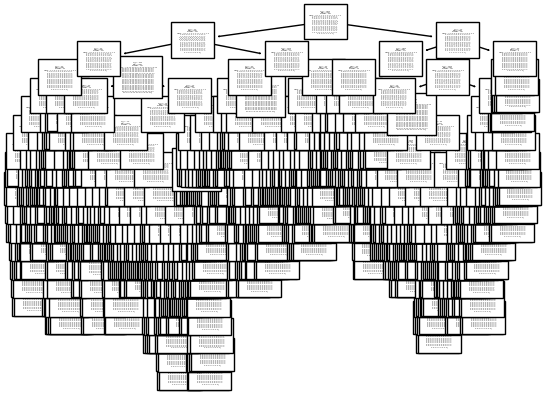

<Figure size 640x480 with 0 Axes>

In [33]:
tree.plot_tree(model.fit(X_,y_),fontsize=True)
plt.show()
plt.savefig('tree.png')

In [35]:
#metrics
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

Available options for average:

average='macro' → Calculates precision for each class and takes the unweighted mean (treats all classes equally).

average='micro' → Calculates global precision across all classes (weighted by number of samples).

average='weighted' → Like macro, but weights each class by its number of samples.

average=None → Returns precision for each class separately

In [36]:
from sklearn.metrics import precision_score

# For multiclass
precision = precision_score(y_test, y_pred, average='macro')  
print("Precision:", precision)


Precision: 0.0040650406504065045


c:\Users\HKT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))


Precision (macro): 0.0040650406504065045
Recall (macro): 0.0027100271002710027
F1 Score (macro): 0.0032520325203252032


c:\Users\HKT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HKT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


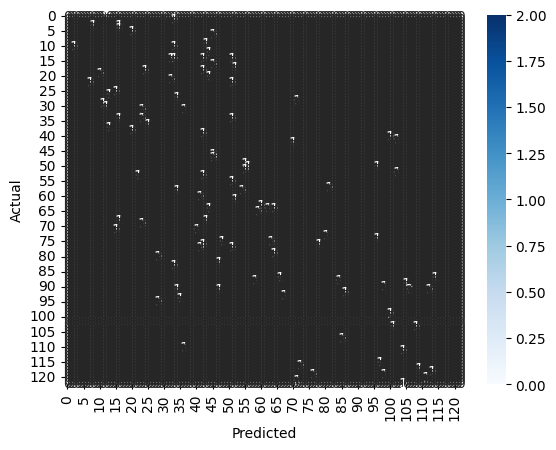

In [ ]:
#create a heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [45]:
#K-Nearest Neighbors
#import library
from sklearn.neighbors import KNeighborsClassifier
#create a model
knn_model = KNeighborsClassifier(n_neighbors=5)
#train the model
knn_model.fit(X_train, y_train)
#make predictions
knn_y_pred = knn_model.predict(X_test)
print("KNN Predictions:", knn_y_pred)

#check accuracy
knn_accuracy = knn_model.score(X_test, y_test)
print("KNN Accuracy:", knn_accuracy)
cm = confusion_matrix(y_test, knn_y_pred)
print(cm)

KNN Predictions: [3500000 3990000 3290000 4200000 2275000 2730000 5250000 2940000 2380000
 2800000 5250000 3255000 3010000 2940000 2275000 1750000 2240000 3710000
 4200000 3710000 5600000 2730000 3500000 1750000 3087000 5250000 2870000
 2485000 3500000 2485000 2653000 2940000 7210000 4235000 3360000 3010000
 3360000 2310000 2450000 2940000 3920000 1750000 5950000 3500000 2730000
 3500000 5775000 3010000 3087000 1855000 7420000 1855000 2450000 3143000
 2345000 2520000 3780000 1767150 3990000 3290000 2310000 3080000 3990000
 2940000 2870000 3010000 5040000 2100000 3773000 3675000 3010000 4270000
 3773000 5600000 2800000 3500000 2870000 2450000 3710000 2852500 5740000
 3150000 3920000 4235000 2240000 3640000 3010000 3150000 7420000 6300000
 2240000 3087000 3129000 1960000 6930000 2940000 3290000 3780000 3920000
 5040000 2380000 3010000 2100000 2100000 4130000 4200000 6300000 4690000
 3290000]
KNN Accuracy: 0.01834862385321101
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 

# Best Model selection

In [60]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 #preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col  = ["area", "bedrooms", "bathrooms", "stories",	"mainroad", "guestroom", "basement", "hotwaterheating",	"airconditioning","parking","prefarea","furnishingstatus"]
for col in cat_col:
    df[col] = le.fit_transform(df[col])
    # encoding categorical variables
    # df = pd.get_dummies(df, columns=cat_col, drop_first=True)
df.head()

df_1 = df

X_ = df_1[["area", "bedrooms", "bathrooms", "stories",	"mainroad", "guestroom", "basement", "hotwaterheating",	"airconditioning","parking","prefarea","furnishingstatus"]]
y_ = df_1["price"]
print(X.shape,y.shape)

#import sklearn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#split data
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)
#initialize the model
models = [LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]
model_names = ["Logistic Regression", "SVM", "Decision Tree", "Random Forest", "KNN"]

model_scores = []
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # print("Precision (macro):", )
    # accuracy = accuracy_score(y_test, y_pred, average='macro'),
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred,average='macro')
    f1 = f1_score(y_test, y_pred,average='macro')
    model_scores.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })
    sorted_models = sorted(model_scores, key=lambda x: x["Accuracy"], reverse=True)
    for model in sorted_models:
        print(f"{model['Model']} - Accuracy: {model['Accuracy']:.2f}, Precision: {model['Precision']:.2f}, Recall: {model['Recall']:.2f}, F1 Score: {model['F1 Score']:.2f}")

(545, 12) (545,)


c:\Users\HKT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HKT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HKT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565

Logistic Regression - Accuracy: 0.02, Precision: 0.00, Recall: 0.02, F1 Score: 0.00
Logistic Regression - Accuracy: 0.02, Precision: 0.00, Recall: 0.02, F1 Score: 0.00
SVM - Accuracy: 0.01, Precision: 0.00, Recall: 0.01, F1 Score: 0.00


c:\Users\HKT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HKT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression - Accuracy: 0.02, Precision: 0.00, Recall: 0.02, F1 Score: 0.00
SVM - Accuracy: 0.01, Precision: 0.00, Recall: 0.01, F1 Score: 0.00
Decision Tree - Accuracy: 0.01, Precision: 0.00, Recall: 0.00, F1 Score: 0.00
Logistic Regression - Accuracy: 0.02, Precision: 0.00, Recall: 0.02, F1 Score: 0.00
SVM - Accuracy: 0.01, Precision: 0.00, Recall: 0.01, F1 Score: 0.00
Decision Tree - Accuracy: 0.01, Precision: 0.00, Recall: 0.00, F1 Score: 0.00
Random Forest - Accuracy: 0.00, Precision: 0.00, Recall: 0.00, F1 Score: 0.00
Logistic Regression - Accuracy: 0.02, Precision: 0.00, Recall: 0.02, F1 Score: 0.00
KNN - Accuracy: 0.02, Precision: 0.01, Recall: 0.01, F1 Score: 0.01
SVM - Accuracy: 0.01, Precision: 0.00, Recall: 0.01, F1 Score: 0.00
Decision Tree - Accuracy: 0.01, Precision: 0.00, Recall: 0.00, F1 Score: 0.00
Random Forest - Accuracy: 0.00, Precision: 0.00, Recall: 0.00, F1 Score: 0.00


c:\Users\HKT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HKT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HKT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{met

# Best Parameters

In [1]:
from sklearn.linear_model import LinearRegression

#create a model
model = LinearRegression()
#get the model parameter
param = model.get_params()
print(param) #output in dictionary


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [2]:
from sklearn.ensemble import RandomForestClassifier
#create model
model = RandomForestClassifier(
)
#get the parameters
parameters = model.get_params()
print(parameters)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [3]:
from sklearn.svm import SVC
moodel = SVC(kernel='linear')
param = model.get_params()
print(param)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [4]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()
param = model.get_params()
print(param)


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [5]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
param = model.get_params()
print(param)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


# Linear regression

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset
df = pd.read_csv('Housing.csv')

X = df[['area']]
y = df['price']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

model = LinearRegression()
 
param_grid = {'fit_intercept':[True,False]}
GridSearchCV(model,param_grid,cv=3)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset
df = pd.read_csv('Housing.csv')

X = df[['area']]
y = df['price']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

model = LinearRegression()
 
param_grid = {'fit_intercept':[True,False]}
grid_search = GridSearchCV(model,param_grid,cv=3,scoring="neg_mean_squared_error")
grid_search.fit(X,y)
print("Best parameter:",grid_search.best_params_)
print("Best parameter:",grid_search.best_estimator_)


Best parameter: {'fit_intercept': False}
Best parameter: LinearRegression(fit_intercept=False)


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset
df = pd.read_csv('Housing.csv')

X = df[['area']]
y = df['price']

# from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

model = KNeighborsRegressor()
 
param_grid = {'n_neighbors': [3,5,7,9,8,11]}
grid_search = GridSearchCV(model,param_grid,cv=3,scoring="neg_mean_squared_error")
grid_search.fit(X,y)
print("Best parameter:",grid_search.best_params_)
print("Best parameter:",grid_search.best_estimator_)

Best parameter: {'n_neighbors': 7}
Best parameter: KNeighborsRegressor(n_neighbors=7)


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset
df = pd.read_csv('Housing.csv')

X = df[['area']]
y = df['price']

# from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()
 
param_grid = {'min_samples_leaf': [1,3,5]}
grid_search = GridSearchCV(model,param_grid,cv=3,scoring="neg_mean_squared_error")
grid_search.fit(X,y)
print("Best parameter:",grid_search.best_params_)
print("Best parameter:",grid_search.best_estimator_)

Best parameter: {'min_samples_leaf': 1}
Best parameter: DecisionTreeClassifier()


c:\Users\HKT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset
df = pd.read_csv('Housing.csv')

X = df[['area']]
y = df['price']

# from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC()
 
param_grid = {  'min_samples_leaf': [1]}
grid_search = GridSearchCV(model,param_grid,cv=3,scoring="neg_mean_squared_error")
grid_search.fit(X,y)
print("Best parameter:",grid_search.best_params_)
print("Best parameter:",grid_search.best_estimator_)


c:\Users\HKT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


ValueError: Invalid parameter 'min_samples_leaf' for estimator SVC(). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].

# K-means Clustering

In [26]:
from sklearn.cluster import KMeans
X=df[["price","area"]]
model = KMeans(n_clusters=5)
model.fit(X)
X["cluster"] = model.labels_



C:\Users\HKT\AppData\Local\Temp\ipykernel_11036\2483253030.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = model.labels_


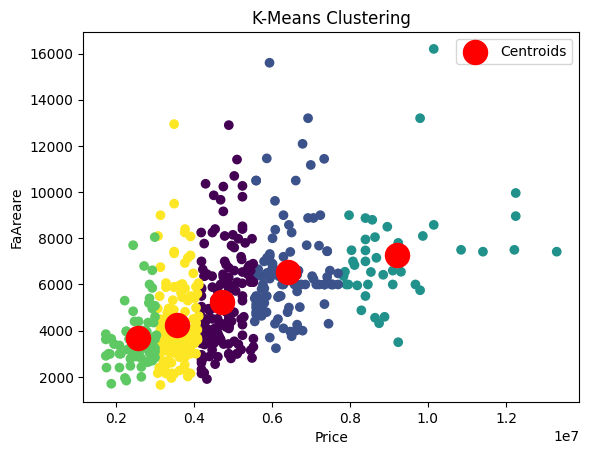

In [27]:
plt.scatter(X['price'], X['area'], c=X['cluster'], cmap='viridis')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Price')
plt.ylabel('FaAreare')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [28]:
import plotly.express as px
fig = px.scatter(X, x='price', y='area', color='cluster', title='K-Means Clustering with Plotly')
fig.show()

In [29]:
#3D plot
import plotly.express as px
fig = px.scatter_3d(X, x='price', y='area', z='cluster', color='cluster', title='3D K-Means Clustering')
fig.show()

In [ ]:
#How to save the model
import joblib
model_save = joblib.dump(model, 'model.joblib')
print("Model save:",model_save)

Model save: ['model.joblib']


In [32]:
#How to load model
model_load= joblib.load( "model.joblib")
print("Model load:",model_load)

Model load: KMeans(n_clusters=5)


In [34]:
#how to save with pickle
import pickle as pkl
# save the object
with open('model.lib', 'wb') as f:
    pkl.dump(model, f)
    #load the object
with open('model.lib', 'rb') as f:
        model = pkl.load(f)